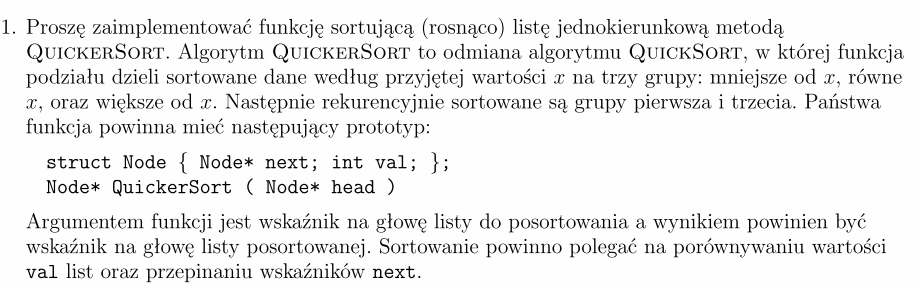

In [1]:
class Node:
    def __init__(self, val=None):
        self.val = val
        self.next = None


def create_linked_list(values: 'iterable' = None) -> 'linked list head (first node)':
    head = Node()  # A sentinel node
    if not values: return head
    head.next = curr = Node(values[0])
    for i in range(1, len(values)):
        curr.next = Node(values[i])
        curr = curr.next
    return head.next


def print_linked_list(ll_head: 'linked list head (first node)'):
    curr = ll_head.next
    print(ll_head.val, end=' ')
    while curr:
        print('->', curr.val, end=' ')
        curr = curr.next
    print()


def QuickerSort(head):
    sentinel = Node()
    sentinel.next = head

    # Perform sorting only if there are at least 2 elements in a linked list
    if head and head.next:
        # Perform sorting on a linked list
        _quicker_sort(sentinel, None)

    return sentinel.next


# begin_idx will be included and end_idx excluded (as in Python's ranges)
def _quicker_sort(begin_prev_node, end_node):
    # Loop till the current sublist has at least 2 elements
    # (calling a partition function for a single-element list is pointless and inefficient,
    # thus it's better to check two conditions in a while loop)
    while begin_prev_node.next is not end_node \
            and begin_prev_node.next.next is not end_node:
        first_end_node, second_begin_prev_node = _partition(begin_prev_node, end_node)
        _quicker_sort(begin_prev_node, first_end_node)
        begin_prev_node = second_begin_prev_node


def _partition(begin_prev_node, end_node):
    # Store a pivot node and a current node pointers in variables
    # Take the first (leftmost) node as a pivot
    pivot_node = begin_prev_node.next
    curr_node = pivot_node.next

    # Prepare sentinel nodes for sublists which will be created
    lt_pivot_head = Node()
    eq_pivot_head = pivot_node
    gt_pivot_head = Node()

    # Prepare pointers to the sublists
    lt_pivot_curr = lt_pivot_head
    eq_pivot_curr = eq_pivot_head
    gt_pivot_curr = gt_pivot_head

    # Distribute subsequent nodes of a linked list part to appropriate sublists
    while curr_node is not end_node:
        if curr_node.val < pivot_node.val:
            lt_pivot_curr.next = curr_node
            lt_pivot_curr = lt_pivot_curr.next
        elif curr_node.val > pivot_node.val:
            gt_pivot_curr.next = curr_node
            gt_pivot_curr = gt_pivot_curr.next
        else:
            eq_pivot_curr.next = curr_node
            eq_pivot_curr = eq_pivot_curr.next
        curr_node = curr_node.next

    # Join created lists together
    # Link a list of elements lower than pivot (lt_pivot) if is not empty
    if lt_pivot_head.next:
        begin_prev_node.next = lt_pivot_head.next
        lt_pivot_curr.next = eq_pivot_head

        if gt_pivot_head.next:
            eq_pivot_curr.next = gt_pivot_head.next
            gt_pivot_curr.next = end_node
        else:
            eq_pivot_curr.next = end_node
    # Link a list of elements greater than pivot (gt_pivot) if is not empty
    elif gt_pivot_head.next:
        begin_prev_node.next = eq_pivot_head
        eq_pivot_curr.next = gt_pivot_head.next
        gt_pivot_curr.next = end_node
    # Otherwise, there will be only eq_pivot linked list (all elements are equal to a pivot)
    else:
        begin_prev_node.next = eq_pivot_head
        eq_pivot_curr.next = end_node

    return eq_pivot_head, eq_pivot_curr

###### Kilka testów

In [2]:
import random

ll = create_linked_list([random.randint(-25, 25) for _ in range(random.randint(0, 50))])
print_linked_list(ll)
ll = QuickerSort(ll)
print()
print_linked_list(ll)

18 -> 21 -> -9 -> -18 -> 21 -> 13 -> -4 -> 13 -> -13 -> 20 -> 6 -> -9 -> 16 -> 7 -> 3 -> -14 -> -22 -> 6 -> 22 -> 23 -> -3 -> -11 -> -2 -> 24 -> -14 -> -14 -> 2 -> 6 -> -24 -> 19 -> -23 -> 19 -> 25 -> 25 -> 20 -> 5 -> -12 -> -25 -> 18 

-25 -> -24 -> -23 -> -22 -> -18 -> -14 -> -14 -> -14 -> -13 -> -12 -> -11 -> -9 -> -9 -> -4 -> -3 -> -2 -> 2 -> 3 -> 5 -> 6 -> 6 -> 6 -> 7 -> 13 -> 13 -> 16 -> 18 -> 18 -> 19 -> 19 -> 20 -> 20 -> 21 -> 21 -> 22 -> 23 -> 24 -> 25 -> 25 
